# COGS 108 - TRITON DRUNK

# Overview
People love beers for different reasons. Some drink beers because beers contain two sleep-promoting 
B vitamins, making them terrific natural sleep aids while some just love the smell and taste of beer.
Beers in the market vary in smell, taste, color, style, and ABV ( Alcohol by Volume). 
This project focus on how those properties influence their overall rating.

We use the datasets from Beer Ratings - Predict the rating of a beer from user reviews (https://www.kaggle.com/c/beer-ratings/) to present the correlation between
beer's properties and beer's overall rating. We also utilize python tool to draw some diagram so we can visualize the correlations.

There is also an ethical problem involved in beer drinking. In many societies, drinking alcohol is forbidden because it causes serious problems, e.g. DUI (Driving under the influence), crime, etc. 
For that reason, in the second part of the project we will also focus on the correlation between alcohol and driving deaths.
We will use data from Occupant and Alcohol-Impaired Driving Deaths in States (https://healthdata.gov/dataset/occupant-and-alcohol-impaired-driving-deaths-states-2005-2014)
to present such correlation.

# Group Members
* Toan Bui                  (A13599266)
* Hongru Yu                 (A13324346)
* Xiaokang (Paul) Lin       (A14694178)
* Haorong Chen              (A13616222)
* Niklas Sprute             (A15105073)
* Cong (Charlie) Li         (A15340342)

# Research Questions

* Main Question: 
    * How do different properties of beer (i.e: taste, palate, aroma and appearance) affect its overall rating? In other words, which property contributes the most to the overall rating of a beer. Additionally, given user reviews, can we determine the sentiment of each review to predict the overall rating for a particular type of beer using NLP/Sentiment analysis?


* Ethical Consideration:
   *  Is there a correlation between the level of alcohol consumption and the number of DUI deaths within a particular state? In other words, if we were to assign to each state a 'State Alcohol-Addiction Index' (which signifies the level of alcohol dependency among the state population), then does a higher index correspond to a higher percentage of DUI deaths compared to all driving deaths? 

# Background and Prior Work

Whenever someone goes to a restaurant, they may struggle to order themselves the right type of beer. Because the process of making beer is very complex, every beer has its own unique taste. In order to analyze how different properties of beer shape its overall impression, an extensive beer survey has been conducted by consumer websites for advertisement purposes (https://www.kaggle.com/c/beer-ratings/). 

We decided to use this beer-ratings data to determine how each property (taste, palate, aroma and appearance) contributes to the overall rating of beer and how those correlations change among different beer types. At the end of our study, we aim to better inform consumers to choose the right beer or at least, when deciding which beer to drink, they can at least take into consideration specific characteristics of beers to guide them toward the best beer choice. 

However, due to our ethical considerations, the second part of our study aims to explore the possible correlation between alcohol consumption and DUI rates in different states. We obtained data from the Behavioral Risk Factor Surveillance System (BRFSS) which is the nation’s premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. 

There exists no prior research utilizing the specific beer-ratings dataset that was chosen for our analysis. 

The online survey data conducted by BRFSS will be used to produce an alcohol consumption rating on each state (which we called "State Alcohol-Addiction Index"). We will then explore the possible correlation between the consumption and DUI. With this part of our study, we aim to warn people about the danger of excessive drinking and what it can lead to afterwards.


# Hypothesis

People tend to enjoy a beverage for its taste instead of how it looks or smells. Take Coke for example: even though Coke has a dark color (instead of being colorful) and it also does not have much smell, people still enjoy drink Coke for its refreshing taste. 

Like Coke, beer is a type of beverage, and hence it is likely that people will also enjoy beer for its taste instead of its aroma or appearance. Hence, we predict that taste will be the feature that contributes the most to the overall rating of beer. 

To verify our hypothesis, we will take into consideration different properties of beer, from appearance, aroma, palate and taste to determine which feature correlates the most to the overall rating of beer. 


# Dataset(s)

* DATASET 1: Beer Ratings - Predict the rating of a beer from user reviews.
    - Link: https://www.kaggle.com/c/beer-ratings/
    
    - For this dataset, we will use the data from appearance, aroma, overall, palate, taste to analyze the correlation between beer's characteristics and its overall rating. We will also use the review/text column to perform NLP analysis and predict beer rating from user's text reviews. 
    

* DATASET 2: BRFSS Table of Alcohol Consumption
    - Link: https://chronicdata.cdc.gov/Behavioral-Risk-Factors/BRFSS-Table-of-Alcohol-Consumption/dts9-xy2f
    - For this dataset, we have the alcohol consumption data categorized by state, year and age. The data is obtained by random phone calls in the designated states asking questions to evaluate the degree of alcohol dependency of each individual, which is then categorized into 3 degrees (regular alcohol consumption, binge drinking and heavy drinking) The geographic location of the calls are also included. 


* DATASET 3: Occupant and Alcohol-Impaired Driving Deaths in States, 2005-2014

    - Link: https://healthdata.gov/dataset/occupant-and-alcohol-impaired-driving-deaths-states-2005-2014
    - This dataset contains data about all persons killed in crashes involving a driver with BAC >= .08 g/dL in different states. from 2005 to 2014
    - We will use the Driving Deaths and Occupant Deaths columns to evaluate how DUI deaths contribute to total driving death (accidents)  


# Setup


In [1]:
# Imports - these provided for you. Do not import any other packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error

# Data Cleaning

In [2]:
alc_consump_dat = pd.read_csv('data/BRFSS__Table_of_Alcohol_Consumption.csv')
dui_dat = pd.read_csv('data/Occupant_and_Alcohol-Impaired_Driving_Deaths_in_States__2005-2014.csv')
beer_dat = pd.read_csv('data/train.csv')
beer_dat_NLP = pd.read_csv('data/train.csv')

alc_consump_dat.drop(columns=['BreakoutID','LocationID','Break_Out_Category','GeoLocation','Locationdesc',
                              'Class','ClassId','TopicId','Data_Value_Footnote_Symbol','DataSource',
                              'Data_Value_Footnote','ResponseID', 'QuestionID', 'BreakOutCategoryID'], inplace=True)
alc_consump_dat = alc_consump_dat.dropna()

dui_dat.drop(columns = ['Location'],inplace=True)
dui_dat = dui_dat.dropna()
dui_dat.columns = dui_dat.columns.str.strip()

beer_dat_NLP = beer_dat.drop(columns=['beer/ABV','beer/beerId','beer/brewerId','beer/name','index',
                                      'user/ageInSeconds','user/gender','user/profileName','user/birthdayUnix',
                                      'user/birthdayRaw','review/timeUnix', 'review/timeStruct']).dropna()
beer_dat = beer_dat_NLP.drop(columns=['review/text'])

/Users/khanhtoanbui/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Analysis and Results

## Part 1: Analyzing the Correlation between Beer Characteristics and its Overall Rating

In [3]:
print("The beer-review dataset contains " + str(len(beer_dat['beer/style'].unique())) + " unique types of beer\n")
print("However, we will only consider the 5 most-reviewed types of beer: ")

top_5_beer = beer_dat['beer/style'].value_counts().head(5).to_frame()
top_5_beer.columns = [' NUMBER OF REVIEWS']
top_5_beer

The beer-review dataset contains 95 unique types of beer

However, we will only consider the 5 most-reviewed types of beer: 


,NUMBER OF REVIEWS
American Double / Imperial Stout,4493
American IPA,3048
American Double / Imperial IPA,2871
Scotch Ale / Wee Heavy,2133
Russian Imperial Stout,2030


In [4]:
to_contain = 'American Double / Imperial Stout|American IPA|American Double / Imperial IPA|Scotch Ale / Wee Heavy|Russian Imperial Stout'
#|American Pale Ale (APA)|American Porter|Rauchbier|Rye Beer|Czech Pilsener'
df_top_5 = beer_dat[beer_dat['beer/style'].str.contains(to_contain , na=False)]

In [5]:
df_top_5 = df_top_5.sort_values(by=['beer/style'])
df_top_5 = df_top_5.reset_index()
df_top_5.drop('index', axis=1, inplace=True)

In [6]:
beer_styles = ['American Double / Imperial Stout', 'American IPA', 'American Double / Imperial IPA','Scotch Ale / Wee Heavy','Russian Imperial Stout']
beer_ratings = [0,0,0,0,0]

appearance_rating_dict = dict(zip(beer_styles,beer_ratings))
palate_rating_dict = dict(zip(beer_styles,beer_ratings))
aroma_rating_dict = dict(zip(beer_styles,beer_ratings))
taste_rating_dict = dict(zip(beer_styles,beer_ratings))
overall_rating_dict = dict(zip(beer_styles,beer_ratings))
                 
for style in beer_styles:
    appearance_rating_dict[style] = round(df_top_5[df_top_5['beer/style'] == style]['review/appearance'].mean(),2)
    palate_rating_dict[style] = round(df_top_5[df_top_5['beer/style'] == style]['review/palate'].mean(),2)
    aroma_rating_dict[style] = round(df_top_5[df_top_5['beer/style'] == style]['review/aroma'].mean(),2)
    taste_rating_dict[style] = round(df_top_5[df_top_5['beer/style'] == style]['review/taste'].mean(),2)
    overall_rating_dict[style] = round(df_top_5[df_top_5['beer/style'] == style]['review/overall'].mean(),2)

appearance_rating_df = pd.Series(appearance_rating_dict).to_frame()
palate_rating_df = pd.Series(palate_rating_dict).to_frame()
aroma_rating_df = pd.Series(aroma_rating_dict).to_frame()
taste_rating_df = pd.Series(taste_rating_dict).to_frame()
overall_rating_df = pd.Series(overall_rating_dict).to_frame()

### Average Rating for each Individual Feature of the 5 Most-Reviewed Beer Styles

In [7]:
appearance_rating_df.columns = ['Appearance Rating']
palate_rating_df.columns = ['Palate Rating']
aroma_rating_df.columns = ['Aroma Rating']
taste_rating_df.columns = ['Taste Rating']
overall_rating_df.columns = ['Overall Rating']

ratings_df = pd.concat([appearance_rating_df, palate_rating_df], axis=1, join='inner')
ratings_df = pd.concat([ratings_df, aroma_rating_df], axis=1, join='inner')
ratings_df = pd.concat([ratings_df, taste_rating_df], axis=1, join='inner')
ratings_df = pd.concat([ratings_df, overall_rating_df], axis=1, join='inner')

print("\nAn Overview of the Ratings for the 5 Most-reviewed Beer Types")

#The dataframe that contains all the individual ratings
ratings_df ## THIS CONTAINS THE AVERAGE RATINGS


An Overview of the Ratings for the 5 Most-reviewed Beer Types


,Appearance Rating,Palate Rating,Aroma Rating,Taste Rating,Overall Rating
American Double / Imperial Stout,4.32,4.35,4.40,4.48,4.33
American IPA,3.97,3.92,3.97,4.01,4.04
American Double / Imperial IPA,3.99,3.98,4.07,4.03,3.87
Scotch Ale / Wee Heavy,3.92,3.96,3.99,4.08,3.92
Russian Imperial Stout,4.21,4.30,4.17,4.31,4.17


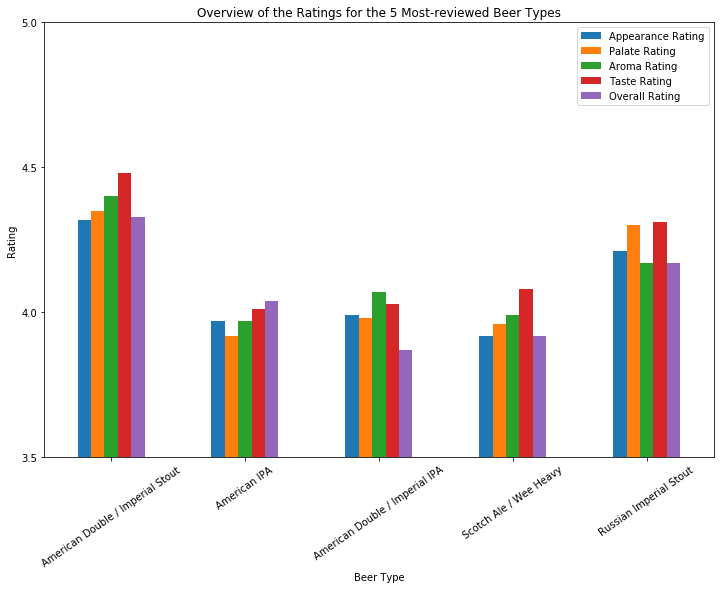

In [8]:
ratings_df.plot.bar(title = 'Overview of the Ratings for the 5 Most-reviewed Beer Types',figsize= (12,8))
labels = [3.5, 4.0, 4.5, 5.0]
plt.yticks(labels)
plt.ylim(3.5,5)
plt.xticks(rotation = 35)
plt.xlabel("Beer Type")
plt.ylabel("Rating")
plt.show()

### Observation:
From the bar chart above, we can see that "American Double/Imperial Stout" is the beer type that receives the highest review in all categories (appearance, palate, aroma, taste and overall)

### Bar Chart Representing the Distribution of Overall Beer Rating (of the 5 Most-Reviewed Beer Types)



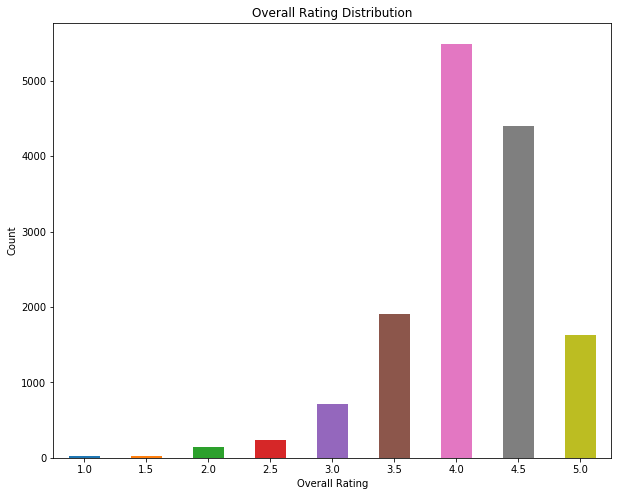

In [9]:
df_top_5['review/overall'].value_counts().sort_index().plot('bar',title = 'Overall Rating Distribution',figsize= (10,8))
plt.xticks(rotation = 0)
plt.xlabel("Overall Rating")
plt.ylabel("Count")
plt.show()

### Observation:
From the bar chart above, we can see that people tend to give an overall rating of 4.0 for the 5 most-popular beer styles. This means that the most-reviewed beers also tend to receive a relatively high overall rating.

In [10]:
df_top_5.columns = ['Style', 'Appearance', 'Aroma', 'OVERALL', 'Palate', 'Taste']
df_top_5 = df_top_5[['Style', 'Appearance', 'Aroma','Palate', 'Taste', 'OVERALL', ]]
data = df_top_5.sample(frac=1)  ## random shuffle the dataframe ( not in place)

## Correlation Between Individual Beer Characteristics and the Overall Rating

Correlation Matrix: the darker the cell signifies that two attributes are more correlated. We want to investigate how each atrribute is correlated with the overall rating. We found strong positive correlation between overall rating and taste, which supports our hypothesis. 

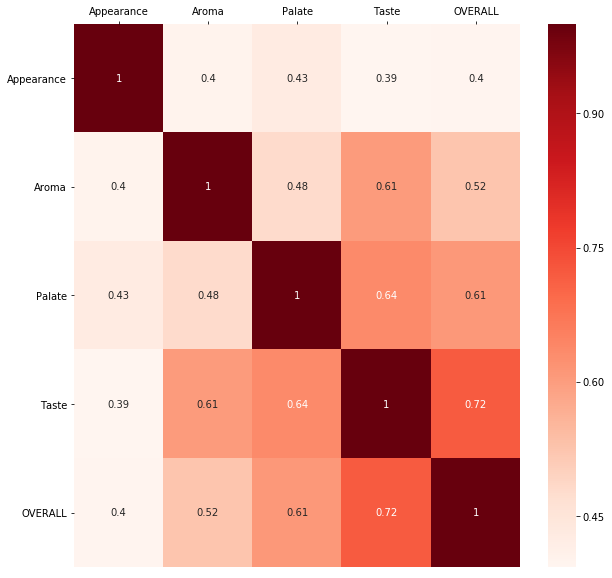

In [11]:
#Using Pearson Correlation
plt.figure(figsize=(10,10))
cor = data.corr()
ax = sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
ax.xaxis.set_ticks_position('top')
loc, labels = plt.yticks()
ax.set_yticklabels(labels, rotation=0)
plt.show()

### OBSERVATION:

* Based on the correlation matrix above, we can see that taste correlates the most (corr = 0.72) with the overall beer rating.
* This supports our initial hypothesis, which predicted that taste is the most important feature of a beer.



## Predicting Overall Beer Rating from Taste, Appearance, Aroma and Palate Ratings  

* In this section, we are splitting the rating data into train and test set (with a 80:20 ratio)
* Given the ratings for the 4 features (taste, appearance, aroma and palate), we will use linear regression to predict the overall rating for each beer style.

In [12]:
def pick_feature(datum): 
    feat=[]
    feat.append( datum['Taste'])
    feat.append( datum['Appearance'])
    feat.append( datum['Aroma'])
    feat.append( datum['Palate']) 
    ##feat.append(datum['review/overall'])
    return feat

In [13]:
x = []
y = []
for index, row in data.iterrows():
    x.append(pick_feature(row))
    y.append(row['OVERALL'])

In [14]:
#SPLITTING INTO TRAIN/TEST SET
train_size = int(len(x)*float(0.8))
test_size =int(len(x)*float(0.2))

trainX = x[ :train_size]
trainY = y[ :train_size]
testX = x[-test_size:]
testY = y[-test_size:]

In [15]:
## train a linear regression model
theta1,residuals1,rank1,s1 = np.linalg.lstsq(trainX ,trainY)

/Users/khanhtoanbui/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [16]:
trainX = np.matrix(trainX)  # convert list to matrix
theta1 = theta1.reshape(4,1) #transpose
testX = np.matrix(testX)
expY = testX*theta1 # experiment value
actY = np.matrix(testY)
expY=expY.reshape(expY.shape[1],expY.shape[0])

## Mean Squared Error on the Prediction

* We predicted the overall rating for each beer, given their individual ratings on each of the 4 features (taste, appearance, aroma and palate). 
* The MSE for our linear regression prediction model is below 0.17, which is respectable given that the rating ranges from 0.0 to 5.0.

In [17]:
test_MSE = mean_squared_error(expY, actY)
test_MSE

0.15719546579470547

# Sentiment/NLP Analysis From User Review Text

* Model Definition:
    - TFIDF Vectorizer
        - Exclude >0.9, <0.001 most frequent document-freq words
        - Binary mode
        - 1-gram + 2-gram
    - Logistic Regressor
        - L1 norm

* Output:
    - Performance of log regression
    - Top 150 most positive / most negative coefficient n-grams

In [18]:
from sklearn import metrics, preprocessing
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.feature_extraction.text import TfidfVectorizer

import re
from nltk.stem.snowball import SnowballStemmer
class CustomTokenizer(object):
    def __init__(self):
        self.stemmer = SnowballStemmer("english")
        self.tokenize = re.compile(r"(?u)\b\w\w+\b")
    def __call__(self, articles):
        return [self.stemmer.stem(t) for t in self.tokenize.findall(articles)]

def define_model():
    # [Sentences/Terms, ...] <-> [Feature vectors, ...]
    X_vectorizer = TfidfVectorizer(
        binary=True,
        max_df=0.9,
        min_df=0.001,
        ngram_range=(1, 2),
        #tokenizer=CustomTokenizer() #takes a while
    )

    # {"NEGATIVE", POSITIVE"} <-> {0, 1}
    y_encoder = preprocessing.LabelEncoder()

    # [Feature vectors, ...] -> [{0,1}, ...]
    clf = LogisticRegression(
        penalty='l1',   # Intuitively more likely for certain words to signal
                        # positive/negative rating. L1 regularization causes
                        # the model coeffs to tend towards sparsity.
        solver='liblinear', # liblinear works well for L1-reg on small dataset
        multi_class='ovr',
        random_state=None,
        #cv=5,
        #n_jobs=3,
        max_iter=10000
    )

    return X_vectorizer, y_encoder, clf

def evaluate(clf, data):
    y_pred = clf.predict(data.X)
    acc = metrics.accuracy_score(data.y, y_pred)
    print(f"Accuracy on {data.name}  is: {acc}\n")
    return acc

In [19]:
class Data:
    def __init__(self, name, raw_X, raw_y, X, y):
        self.name = name
        self.raw_X = raw_X
        self.raw_y = raw_y
        self.X = X
        self.y = y

def read_files(X_vectorizer, y_encoder, train_fname, dev_fname):
    def read_labeled(fname):
        with open(fname, 'r') as file:
            raw_X = []
            raw_y = []
            for line in file:
                label, text = line.strip().split('\t')
                raw_X.append(text)
                raw_y.append(label)
        return raw_X, raw_y

    fnf = "%s set file not found. File name must end in \"%s\""
    if train_fname is None:
        raise Exception(fnf % ('train', 'train.tsv'))
    if dev_fname is None:
        raise Exception(fnf % ('dev', 'dev.tsv'))
    train_raw_X, train_raw_y = read_labeled(train_fname)
    dev_raw_X, dev_raw_y = read_labeled(dev_fname)

    train_X = X_vectorizer.fit_transform(train_raw_X)
    train_y = y_encoder.fit_transform(train_raw_y)

    dev_X   = X_vectorizer.transform(dev_raw_X)
    dev_y   = y_encoder.transform(dev_raw_y)

    train_data = Data('train', train_raw_X, train_raw_y, train_X, train_y)
    dev_data = Data('dev', dev_raw_X, dev_raw_y, dev_X, dev_y)

    return train_data, dev_data

In [20]:
train_size = int(0.95 * len(beer_dat_NLP))
train_dat = beer_dat_NLP[:train_size]
with open('data/train.tsv', 'w') as train:
    for score, text in zip(train_dat['review/overall'], train_dat['review/text']):
        label = ('POSITIVE', 'NEGATIVE')[score < 4]
        text = text.replace('\t', ' ')
        train.write(f"{label}\t{text}\n")
dev_dat = beer_dat_NLP[train_size:]
with open('data/dev.tsv', 'w') as dev:
    for score, text in zip(dev_dat['review/overall'], dev_dat['review/text']):
        label = ('POSITIVE', 'NEGATIVE')[score < 4]
        text = text.replace('\t', ' ')
        dev.write(f"{label}\t{text}\n")

In [21]:
X_vectorizer, y_encoder, clf = define_model()

train_data, dev_data = read_files(X_vectorizer, y_encoder, "data/train.tsv", "data/dev.tsv")

clf.fit(train_data.X, train_data.y)

evaluate(clf, train_data)
evaluate(clf, dev_data)

N = 150
print(f"{N} most positive grams:")
w = []
indices = np.argpartition(clf.coef_, -N)[0][-N:]
for k, v in X_vectorizer.vocabulary_.items():
    for i in indices:
        if v == i:
            w.append(k)
print(w)

print(f"\n{N} most negative grams:")
w = []
indices = np.argpartition(-clf.coef_, -N)[0][-N:]
for k, v in X_vectorizer.vocabulary_.items():
    for i in indices:
        if v == i:
            w.append(k)
print(w)

Accuracy on train  is: 0.8296785062473677

Accuracy on dev  is: 0.8138666666666666

150 most positive grams:
['nice', 'indeed', 'this is', 'full', 'good', 'up', 'solid', 'very nice', 'with this', 'oil', 'black', 'chocolate', 'molasses', 'tasty', 'wonderful', 'refreshing', 'oak', 'very solid', 'nicely', 'balanced', 'quaffable', 'creamy', 'well', 'right', 'rich', 'rounded', 'very well', 'today', 'lovely', 'easy', 'love', 'damn', 'delicious', 'drinkable', 'ipa', 'perfect', 'fine', 'smooth', 'very smooth', 'coffee', 'complex', 'kbs', 'well done', 'yet', 'founders', 'pleasant', 'session', 'great', 'of flavor', 'very pleasant', 'very drinkable', 'not too', 'not overpowering', 'very easy', 'citrus', 'crisp', 'pleasantly', 'but not', 'easy to', 'wonderfully', 'really nice', 'is good', 'disappoint', 'beautiful', 'amazing', 'helles', 'mocha', 'the coffee', 'bad thing', 'fresh', 'quite good', 'easily', 'nicely done', 'summer', 'sessionable', 'perfectly', 'raspberries', 'raspberry', 'is great', 'g

### Observation
* The Accuracy of our prediction model is reasonably high at 83%.
* some of interesting positive traits are "chocolate", "molasses", "balanced", "rounded", "decent lacing", "maple", "german".
* some of interesting negative traits are "bland", "water", "sour", "strange", "fade quickly", "cheap".

# Part 2: ETHICS (How Alcohol Consumption Contributes to Driving Deaths)

In many societies, drinking alcohol is forbidden because it causes serious problems, e.g. DUI (Driving under the influence), crime, etc. 

For that reason, in this part of the project, we will also focus on the correlation between alcohol consumption and driving deaths.

We will use data from Occupant and Alcohol-Impaired Driving Deaths in States (https://healthdata.gov/dataset/occupant-and-alcohol-impaired-driving-deaths-states-2005-2014) as well as BRFSS Table of Alcohol Consumption (https://chronicdata.cdc.gov/Behavioral-Risk-Factors/BRFSS-Table-of-Alcohol-Consumption/dts9-xy2f) to present such a correlation.

In [22]:
# Only keeping years before 2014 since our DUI data is from 2005-2014
# The overall evaluation is selected and we only care about people who response yes in the survey data
alc_dat_overall = alc_consump_dat[alc_consump_dat['Year'] <= 2014]
alc_dat_overall = alc_dat_overall[alc_dat_overall['Break_Out'] == 'Overall']
alc_dat_overall = alc_dat_overall[alc_dat_overall['Response'] == 'Yes']

In [23]:
alc_dat_overall.drop(columns = ['Question','Response', 'Confidence_limit_Low', 'Confidence_limit_High', 
                                'Display_order', 'Data_value_unit','Data_value_type', 
                                'Break_Out', 'Sample_Size'], inplace = True)
alc_dat_overall.reset_index(drop = True, inplace = True)

### We will assign weights for different types of alcohol consumption based on addiction level:
* Regular Alcohol Consumption is the least serious type of addiction, with an addiction index of 1
* Binge Drinking has an addiction index of 2
* Heavy Drinking has an addiction index of 3 

In [24]:
#create a function that quantifies drinking level
def quantify_topic(drinking_level):
    return_val = 0
    if 'Alcohol Consumption' in drinking_level:
        return_val = 1
    elif 'Binge Drinking' in drinking_level:
        return_val = 2
    elif 'Heavy Drinking' in drinking_level:
        return_val = 3
    return return_val

In [25]:
alc_dat_overall['Topic'] =alc_dat_overall['Topic'].apply(quantify_topic)

In [26]:
alc_dat_overall['multi'] = alc_dat_overall['Topic'] * alc_dat_overall['Data_value']
alc_dat_overall.sort_values('Locationabbr')
print()

In [27]:
# generate an alcholic rating list of states
result = {}
for loc in alc_dat_overall['Locationabbr'].unique():
    df = alc_dat_overall[alc_dat_overall['Locationabbr']==loc].copy()
    df['val'] = df['Topic']*df['Data_value']
    average = int(df['val'].sum(axis=0) / 4)
    result.setdefault(loc, average)
final = pd.DataFrame(columns=['State', 'Alcoholic Rating'])
final['State'] = alc_dat_overall['Locationabbr'].unique()
final['Alcoholic Rating'] = final['State'].map(result)

In [28]:
#calculating percentage death caused by DUI
hold = []
i = 0
while i < dui_dat.shape[0]:
    hold.append(dui_dat.iloc[i]['Alcohol-Impaired Driving Deaths']/dui_dat.iloc[i]['Occupant Deaths']*100)
    i+=1
dui_dat['% Death Caused by DUI'] = hold

In [29]:
dui_dat['% Death Caused by DUI'] = dui_dat['% Death Caused by DUI'].round(2)
dui_dat.sort_values(by = ['% Death Caused by DUI'], inplace = True, ascending=False)
dui_dat.reset_index(drop = True, inplace = True)
dui_dat.head()

,State,Alcohol-Impaired Driving Deaths,Occupant Deaths,% Death Caused by DUI
0,HI,453,587,77.17
1,DC,96,130,73.85
2,RI,265,429,61.77
3,CT,1049,1806,58.08
4,DE,430,767,56.06


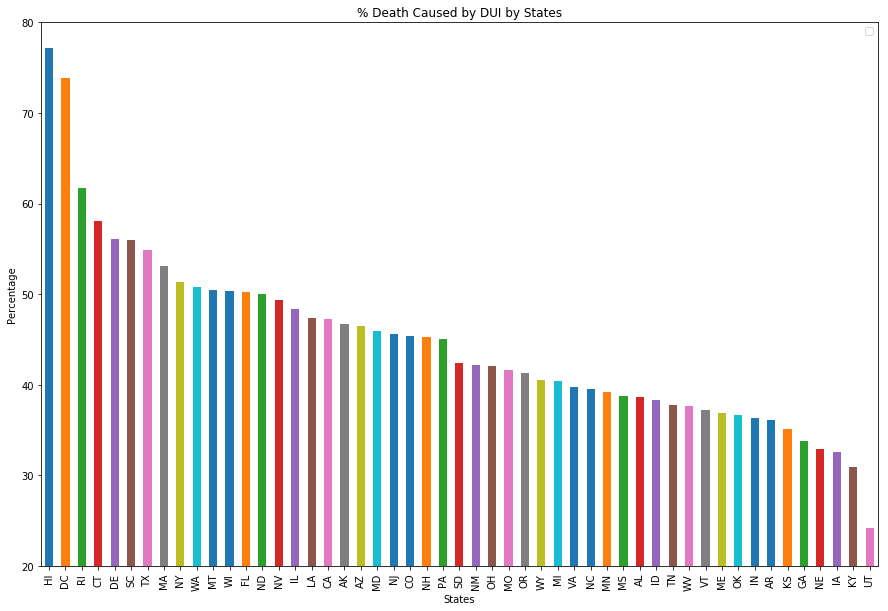

In [30]:
# a bar graph to show general information about %Death caused by DUI

dui_dat.plot('State', '% Death Caused by DUI', kind = 'bar', figsize = (15, 10))
plt.title("% Death Caused by DUI by States")
plt.xlabel("States")
plt.ylabel("Percentage")
plt.legend("")

labels = [20, 30,40,50, 60,70,80]
plt.yticks(labels)
plt.ylim(20,80)

plt.show()

### Observation:
* From the plot above, we can see that Rhode Island is the state with the highest percentage of driving death due to DUI (61.77%)


* Even though it may seems that Hawaii and DC are the states with the highest percentage of driving death due to DUI, it turns out that these two states are outliers. This is pointed out in the box plots below. We believe this is due to the fact that Hawaii and DC are small states with low population, meaning that there will be less traffic. Hence, people are less likely to be involved in traffic accidents unless they are driving under influence.


### BOX PLOTS SHOWING THE SPREAD OF THE DATA 

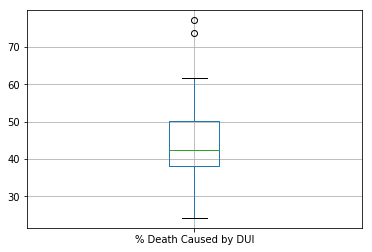

In [31]:
# check if there are outliers
dui_dat.boxplot(column = ['% Death Caused by DUI'])

    It appears that 2 states/regions are outliers in our dataset. They are Hawaii and DC.

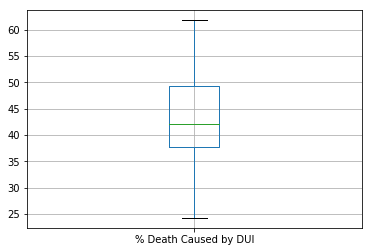

In [32]:
# remove outliers
dui_dat.drop([0, 1], inplace = True)
dui_dat.reset_index(drop = True)
dui_dat.boxplot(column = ['% Death Caused by DUI'])


### OBSERVATION: 
Out of 49 observations, the mean is 43% with lower quartile 38% and upper quartile at 49%.

### Bar Chart Representing the Percentage of DUI Deaths by States (With Outliers Removed)

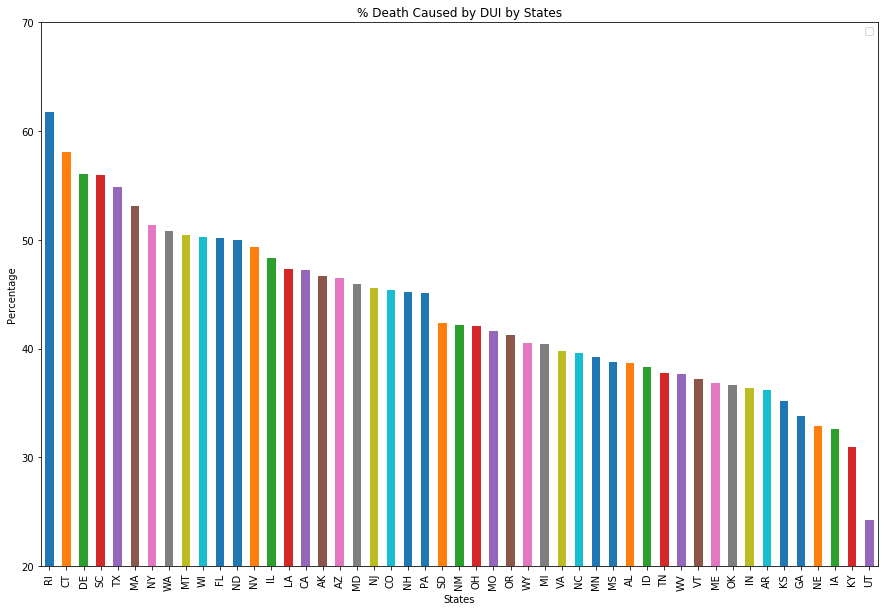

In [33]:
dui_dat.plot('State', '% Death Caused by DUI', kind = 'bar', figsize = (15, 10))
plt.title("% Death Caused by DUI by States")
plt.xlabel("States")
plt.ylabel("Percentage")
plt.legend("")

labels = [20, 30,40,50, 60, 70]
plt.yticks(labels)
plt.ylim(20,70)

plt.show()

### Observation: 

* After removing the outliers (Hawaii and DC), it is clear that Rhode Island is the state with the highest percentage of driving death due to DUI (61.77%)

In [34]:
dui_dat['% Death Caused by DUI'].describe().round(2)

count    49.00
mean     43.44
std       7.75
min      24.23
25%      37.74
50%      42.15
75%      49.34
max      61.77
Name: % Death Caused by DUI, dtype: float64

In [35]:
merged_final = final.merge(dui_dat, how='inner', on=['State'])

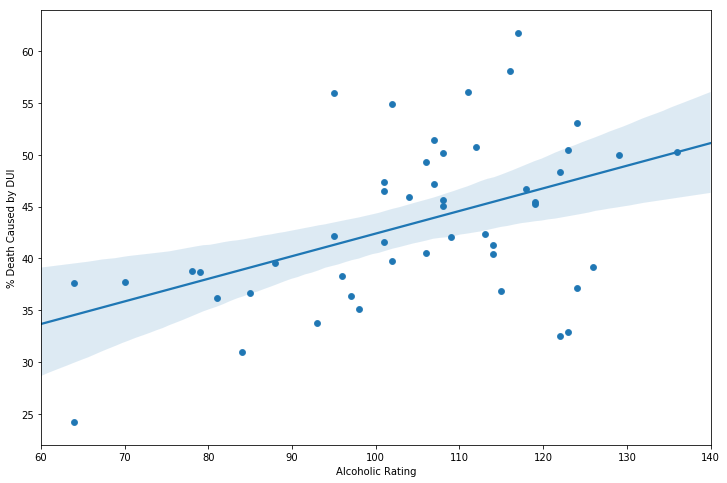

In [37]:
merged_final.plot.scatter(x='Alcoholic Rating',y='% Death Caused by DUI', figsize=(12,8))
sns.regplot(x='Alcoholic Rating',y='% Death Caused by DUI', data=merged_final, fit_reg=True)
plt.show()

### OBSERVATION: 
* We define "State Alcohol-Addiction Index" as higher index means having more people with alcohol addiction
* There exists a positive correlation between State Alcohol-Addiction Index and % death caused by DUI

# Ethics and Privacy


### Maintain Data Anonymously:


- Data Collection:
    The DUI and Alcohol Consumption data were both collected by BRFSS, a national phone survey program certified by the CDC. Random sampling was used to collect data. We have scrambled out geographic of the phone locations. The alcohol ratings data is made publicly available by Kaggle, a trusted data science website. The online ID for each user review is dropped. The specific collection method is unknown but it is trusted.
    

- Data Storage: Since all data used is publicly available, there is no concern of protect and secure the data. After the project submission, we plan to scramble all data immediately.


- For analysis and modeling, we follow the basic guidelines of fairness, explainability and bias. The code is attached for specific examinations

     * The beer-rating data is taken from Kaggle.com. The dataset contains private information such as username, age and birthday. However, we followed the safety-harbor method to safely remove such information to protect user privacy. We expect little bias in this dataset since it is simply an online survey of beer ratings. However, it is possible that non-drinkers are likely to give a lower rating. We minimized such bias by only focusing on the 5 most-popular beer types, thus ignoring outliers. 
     
     * The BRFSS: Table of Alcohol Consumption dataset contains sensitive information such as gender, age, income group and GeoLocation. Again, we followed the safety-harbor method to safely remove such information to protect user privacy. We expect no bias in this dataset since it covers all gender, age and income groups among all states in America. 
     
     * The Occupant and Alcohol-Impaired Driving Deaths in States, 2005-2014 dataset contains GeoLocation information, which we removed to protect user privacy. We expect no bias in this dataset since it covers DUI data from all states in America.
 

### Ethical Considerations:
This study will not be used to advocate alcohol usage among underage students
Although the result may show preference and guidance of reviewing beers, any consequence of binge drinking is not the intention of our study.
To prevent the negative consequences that the study will bring, we included an additional part where we explore the correlation between alcohol consumption and DUI rates


# Conclusion

In the first part of our study about beer ratings, we found out that the most popular beer styles among American drinkers are "American Double/Imperial Stout", "American IPA", "American Double/Imperial IPA", "Scotch Ale/Wee Heavy", "Russian Imperial Stout". And among all beer characteristics, "taste" and "palate" are the ones that have most impact on a person's overall rating of beer. This suggests that beer consumers mainly value how beer tastes rather than fancy packaging on the visual level.

We created two prediction models for different purposes: 
* In first model, we are able to predict a user's subjective overall rating from their ratings in "taste", "palate", "aroma" and "appearance". And the result is reasonably accurate with MSE less than 1.7 (each individual rating ranges from 0.0 to 5.0). 
* In the second model, we were able to extract some of the positive and negative traits of a good beer as presented earlier. These are the traits the beer manufacturers can consider and put more emphasis on in future production of beer.

In the second part of our study about DUI, we have a solid conclusion that driving under influences are very deadly, as it makes up for 43% of total driving deaths on average. And, as the percentage of people consuming alcohols increases, the percentage of death under DUI also increases, which indicates a strong positive correlation. This implies that the region with stronger drinking culture are more likely to ignore DUI laws, which often results in more deaths due to DUI. We believe that this study about DUI will help the society recognize the seriousness of driving under influence as it is the most direct cause of driving deaths.